In [1]:
import sys
from os import listdir
from os.path import isfile, join, exists
import numpy as np
from scipy import misc
import keras
from keras.models import Model
from keras.layers import Input, Convolution2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import glob
import argparse
import tensorflow as tf
import numpy as np
from scipy import misc
from PIL import Image

TRAIN_IMAGES_PATH_X = '/home/sy15/Desktop/xray_images/train_images_64x64/*.png'
TRAIN_IMAGES_PATH_Y = '/home/sy15/Desktop/xray_images/train_images_128x128/*.png'
TEST_IMAGES_PATH_X = '/home/sy15/Desktop/xray_images/test_images_64x64/*.png'

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13946864345845918923, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 125763584
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12718729424928160270
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 45ac:00:00.0, compute capability: 3.7"]

In [2]:
inputs = Input(shape=(32, 32, 1))
x = Convolution2D(64, 3, 3, input_shape=(32, 32, 1), border_mode='same',activation='relu', init='he_normal')(inputs)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64 ,3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(64, 3, 3, border_mode='same', activation='relu', init='he_normal')(x)
x = Convolution2D(1, 3, 3, border_mode='same', init='he_normal')(x)
out = keras.layers.Add()([inputs, x])
m = Model(inputs, out)
m.compile(Adam(lr=0.001), 'mse')

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 1..., activation="relu", padding="same", kernel_initializer="he_normal")`
  from ipykernel import kernelapp as app
/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer="he_normal")`
  app.launch_new_instance()
/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer="he_normal")`
/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", kernel_initializer="he_normal")`
/anaconda/envs/py36/lib/

In [3]:
def getScore(result, truth):
    k = 0
    ret = 0
    while k < 2000:
        ret += np.sqrt(np.mean((result[k]-truth[k])**2))
        k += 1
    return ret

In [4]:
def getTrainImages(path):
    imagesDir = glob.glob(path)
    imagesDir = imagesDir[int(len(imagesDir)/3): len(imagesDir)]
    images = []
    for image in imagesDir:
        image = Image.open(image)
        if path.find("64") > -1:
            image = image.resize((128, 128), Image.LANCZOS) 
        image = np.array(image)
        image = image/255
        image = image[:, :, 0]
        for x in range(0, image.shape[0], 32):
            for y in range(0, image.shape[1], 32):
                images.append(image[x:x+32,y:y+32])
        #patches = extract_patches_2d(image, (32, 32))
        #images.extend(patches)
    images = np.array(images)
    return images

In [5]:
x_train = getTrainImages(TRAIN_IMAGES_PATH_X)
print(x_train.shape)

(170560, 32, 32)


In [6]:
y_train = getTrainImages(TRAIN_IMAGES_PATH_Y)
print(y_train.shape)

(170560, 32, 32)


In [ ]:
m.fit(np.expand_dims(x_train,-1), np.expand_dims(y_train,-1), batch_size=5, nb_epoch=10)

Epoch 1/10
    25/170560 [..............................] - ETA: 20:39 - loss: 2.6112e-04

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


139015/170560 [=======================>......] - ETA: 2:25 - loss: 3.5024e-0 - ETA: 2:26 - loss: 3.5023e-04

In [71]:
import scipy
testImagesYDir = glob.glob(TRAIN_IMAGES_PATH_Y)
testImagesXDir = glob.glob(TRAIN_IMAGES_PATH_X)
print(testImagesYDir[0])
print(testImagesXDir[0])

pred = []
truth = []
for i in range(len(testImagesYDir) - 2000, len(testImagesYDir), 1):
    test = Image.open(testImagesXDir[i])
    test = test.resize((128, 128),  Image.LANCZOS) 
    test = np.array(test)
    test = test[:,:,0]/255
    test_y = Image.open(testImagesYDir[i])
    test_y = np.array(test_y)[:,:,0]
    finalImage = np.zeros((128, 128))
    for x in range(0, 128, 32):
        for y in range(0, 128, 32):
            result = m.predict(np.expand_dims(np.expand_dims(test[x:x+32, y:y+32], -1),0))[:,:,:,0]
            finalImage[x:x+32, y:y+32] = result[0]
    finalImage = 255*finalImage
    finalImage[finalImage[:]<0] = 0
    finalImage[finalImage[:]>255] = 255
    pred.append(finalImage)
    truth.append(test_y)

/home/sy15/Desktop/xray_images/train_images_128x128/train_12202.png
/home/sy15/Desktop/xray_images/train_images_64x64/train_12202.png


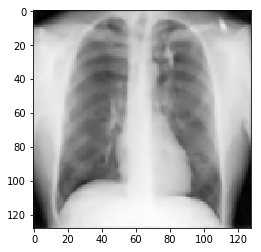

(128, 128)


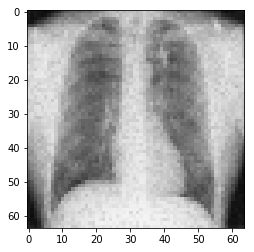

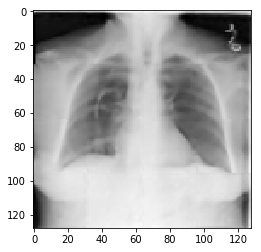

9726.905612597251


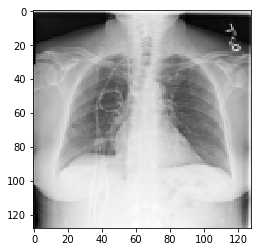

In [74]:
import matplotlib.pyplot as plt
im = Image.open('/home/sy15/Desktop/pred2/test_02542.png')
plt.imshow(im)
plt.show()
print(np.array(im).shape)
im = Image.open('/home/sy15/Desktop/xray_images/test_images_64x64/test_02542.png')
plt.imshow(im)
plt.show()
plt.imshow(pred[10], cmap='gray')
plt.show()
plt.imshow(truth[10], cmap='gray')
print(getScore(truth, pred))

In [20]:
import scipy
testDir = glob.glob(TEST_IMAGES_PATH_X)
for path in testDir:
    test = Image.open(path)
    test = test.resize((128, 128), Image.LANCZOS) 
    test = np.array(test)
    test = test[:,:,0]/255
    finalImage = np.zeros((128, 128))
    for x in range(0, 128, 32):
        for y in range(0, 128, 32):
            result = m.predict(np.expand_dims(np.expand_dims(test[x:x+32, y:y+32], -1),0))[:,:,:,0]
            finalImage[x:x+32, y:y+32] = result[0]
    finalImage = 255*finalImage
    finalImage[finalImage[:]<0] = 0
    finalImage[finalImage[:]>255] = 255
    split = path.split("/")
    image = Image.fromarray(finalImage)
    image = image.convert("L")
    image.save('/home/sy15/pred6/' + split[len(split) - 1])

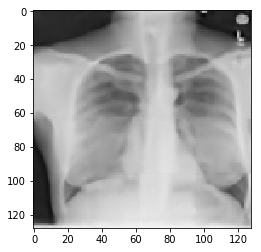

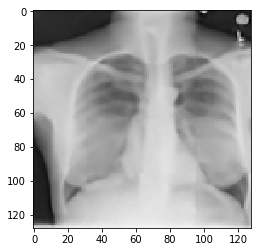

In [23]:
plt.imshow(Image.open('/home/sy15/Desktop/pred3/test_02188.png'))
plt.show()
plt.imshow(Image.open('/home/sy15/pred6/test_02188.png'))

In [ ]:
#pred-5  8729.681267963495
#pred-6  8546.632118822408